# Investment Assignment. 
#### Problem statement
- Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### Data provided
- companies.csv - A table with basic data of companies
- rounds2.csv - A table with funding round details
- mapping.csv - This file maps the numerous category names in the companies table to eight broad sector names. 


In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

## Checkpoints - Data Cleaning 1
- Load the companies and rounds data. Use encoding to read "ISO-8859-1" to read csv files.
- Find out the column in both tables to merge the two dataframe
- Merge the two dataframe to create master_frame

In [2]:
# Read both files
companies = pd.read_csv("companies.csv", encoding="ISO-8859-1") 
rounds2 = pd.read_csv("rounds2.csv", encoding="ISO-8859-1")

##### Let's first analyse companies dataframe

In [3]:
# check first few records of companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
# check the shape of companies df
companies.shape

(66368, 10)

In [5]:
# check the info about companies columns
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [8]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [9]:
# Convert "permalink" in lower case
companies.permalink = companies.permalink.str.lower()

In [10]:
# No of unique company in companies table 
len(companies.permalink.unique())

66368

##### Let's analyse rounds2 data now

In [11]:
# check first few records of rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [12]:
# check the shape of rounds2 df
rounds2.shape

(114949, 6)

In [13]:
# check the shape of rounds2 df
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [12]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

### Observations
 - Column "permalink" in companies dataframe is unique 
 - Since "permalink" in companies df is changed to lower case let's convert the company_permalink in rounds2 in lower case too

In [14]:
# change the company_permalink to lower case
rounds2.company_permalink = rounds2.company_permalink.str.lower()

In [15]:
# Verify the column again
rounds2.sample(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
9000,/organization/auto-genie,/funding-round/23f504f86ece39668f6d187d7601036d,seed,NaN,28-09-2015,100000.0
34716,/organization/fanminder,/funding-round/57f7d2cb9a31a5063069c1015276647e,seed,NaN,01-11-2011,1000000.0
40004,/organization/givit,/funding-round/28c447bb4185d1203431b8fa83421349,venture,NaN,02-10-2012,2500000.0
33164,/organization/eurosite-power,/funding-round/78d4a12e47a152834739310e279c2b61,debt_financing,NaN,19-09-2014,3000000.0
97211,/organization/tab-solutions,/funding-round/09d1f15502dbb637417b70cf6a465d04,seed,NaN,21-07-2014,20352.0


In [15]:
# get the unique company in round2 table using unique()
len(rounds2.company_permalink.unique())

66370

#### Merge both the DF to create master_frame
 - Merge based on company_permalink and permalink columns in rounds2 and companies table respectively
 - After merging analyse and clean the master_frame
 - Drop the columns which are not required

In [16]:
# Merge both datafrmae
master_frame = pd.merge(rounds2, companies, how = 'inner', left_on = "company_permalink", right_on="permalink")

In [17]:
# check the top few records
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [18]:
# shape of new merged df
master_frame.shape

(114942, 16)

In [19]:
# Number of unique company in merge dataframe master_frame
len(master_frame.company_permalink.unique())

66363

#### Comment about number of matching compnany in both table
- Total number of unique company in companies table = 66368
- Total number of unique company in round2 table = 66370
- Total number of unique company in merge_frame table = 66363. This shows there are companies in the rounds2 file which are not present in companies 



#### Cleaning the master_frame data

In [20]:
# Since the "funding_round_code" column has very high null values and it's of no significance, let's drop this. Similarly for 
# founded_at, state_code, region, city columns can be dropped. remove duplicate column permalink also
master_frame = master_frame.drop(["funding_round_code", "founded_at", "state_code", "region","city","funding_round_permalink", "permalink", "homepage_url"], axis=1)

In [21]:
# shape new merged df
master_frame.shape

(114942, 8)

In [22]:
# Let's find out the null values in all columns
master_frame.isnull().sum()

company_permalink         0
funding_round_type        0
funded_at                 0
raised_amount_usd     19984
name                      1
category_list          3407
status                    0
country_code           8671
dtype: int64

In [24]:
# find out rows having all empty columns
master_frame.isnull().all(axis=1).sum()

0

In [25]:
# check the % of null values in each column
len_df = len(master_frame.index)
round(100*(master_frame.isnull().sum()/len_df),2)

company_permalink      0.00
funding_round_type     0.00
funded_at              0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.96
status                 0.00
country_code           7.54
dtype: float64

##### Check the country_code column and drop the records as it's not possible to impute these records. Also, Clean category_list

In [26]:
# check the null value in country_code
master_frame[(master_frame.country_code.isnull())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
3,/organization/-the-one-of-them-inc-,venture,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
32,/organization/1000chi,angel,01-04-2010,43923865.0,Beijing 1000CHI Software Technology,Mobile,operating,NaN
66,/organization/10k-2,seed,04-09-2015,100000.0,Beans Around,Coffee|Delivery|Subscription Service,operating,NaN
71,/organization/10tracks-2,venture,03-02-2014,NaN,10tracks,iOS|Mobile|Music,operating,NaN
72,/organization/10tracks-2,seed,31-07-2013,NaN,10tracks,iOS|Mobile|Music,operating,NaN
...,...,...,...,...,...,...,...,...
114829,/organization/zuumtel,seed,01-04-2013,100000.0,ZUUMTEL,Automotive|Design|Real Time,closed,NaN
114842,"/organization/zwayo-""on-demand-valet-parking""",seed,01-09-2014,60000.0,"Zwayo ""On-Demand Valet Parking""",Apps|Cars|Parking,operating,NaN
114853,/organization/zyfin,venture,01-11-2011,NaN,Zyfin,Finance,operating,NaN
114939,/organization/ãeron,venture,01-08-2014,NaN,ÃERON,NaN,operating,NaN


In [27]:
# drop the records having country_code as null
master_frame = master_frame[~(master_frame.country_code.isnull())]

In [28]:
# drop records where category_list is null
master_frame = master_frame[~(master_frame.category_list.isnull())]

In [29]:
master_frame.shape

(104532, 8)

##### I will now analyse and clean raised_amount_usd column

In [30]:
# find out no of records having null value 
master_frame.raised_amount_usd.isnull().sum()

16003

In [31]:
master_frame.raised_amount_usd.describe()

count    8.852900e+04
mean     1.047385e+07
std      1.118118e+08
min      0.000000e+00
25%      3.705180e+05
50%      1.800000e+06
75%      7.100000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [32]:
master_frame.raised_amount_usd.value_counts()

1000000.0     2703
2000000.0     2112
500000.0      1994
5000000.0     1948
10000000.0    1948
              ... 
19341550.0       1
1995299.0        1
2602187.0        1
1995326.0        1
762970.0         1
Name: raised_amount_usd, Length: 20693, dtype: int64

In [33]:
# check the records having null value and counts of such records
master_frame[(master_frame.raised_amount_usd.isnull())]

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
1,/organization/-qounter,venture,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
5,/organization/004-technologies,venture,24-07-2014,NaN,004 Technologies,Software,operating,USA
14,/organization/1,undisclosed,05-02-2013,NaN,One Inc.,Mobile,operating,USA
17,/organization/1-4-all,equity_crowdfunding,21-04-2013,NaN,1-4 All,Entertainment|Games|Software,operating,USA
18,/organization/1-618-technology,equity_crowdfunding,22-01-2014,NaN,1.618 Technology,Networking|Real Estate|Web Hosting,operating,USA
...,...,...,...,...,...,...,...,...
114891,/organization/zymr-inc-,angel,01-01-2014,NaN,"Zymr, Inc.",Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA
114892,/organization/zymr-inc-,angel,12-12-2012,NaN,"Zymr, Inc.",Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA
114898,/organization/zynergy-projects-services,venture,19-08-2015,NaN,Zynergy Projects & Services,Clean Technology,operating,IND
114906,/organization/zynga,angel,01-01-2007,NaN,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA


In [34]:
# since this column is important for analysis and it's our target variable. let's drop the records having null value
master_frame = master_frame[~(master_frame.raised_amount_usd.isnull())]

In [35]:
# Shape of master frame after removing null records
master_frame.shape

(88529, 8)

In [36]:
# calculate the % again
round(100*(master_frame.isnull().sum()/len_df),2)

company_permalink     0.0
funding_round_type    0.0
funded_at             0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
status                0.0
country_code          0.0
dtype: float64

#### The master_frame looks clean now and its ready for further analysis. Reset the index

In [37]:
#Reset the index
master_frame.reset_index(inplace=True, drop=True)

## Checkpoint 2 - Funding Type Analysis
- Find out the most suitable funding type for spark funds among seed, angel, venture and private equity.
- Group the master_frame data on funding_round_type and find the out the suitable one

In [38]:
# Set the display option with 2 decimal points
pd.set_option('display.float_format','{:.2f}'.format)

##### Draw box plots and remove records having outliers values

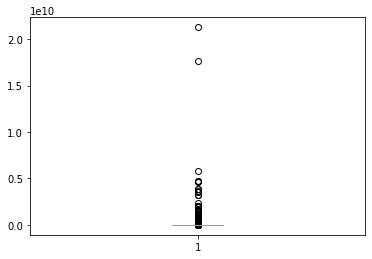

In [39]:
# Boxplot the raised_amount_usd column to see the spread of values
plt.boxplot(master_frame.raised_amount_usd)
plt.show()

In [40]:
# There are many outliers in this column. I will drop the records raised_amount_usd > 5000 M USD
master_frame = master_frame[master_frame.raised_amount_usd < 5000000000.00]

In [41]:
#master_frame.groupby("funding_round_type").raised_amount_usd.describe()
master_frame.raised_amount_usd.describe()

count        88526.00
mean       9969585.29
std       59346358.15
min              0.00
25%         370427.25
50%        1800000.00
75%        7096252.50
max     4745460219.00
Name: raised_amount_usd, dtype: float64

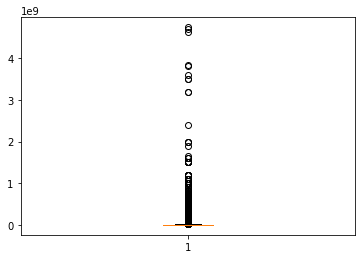

In [42]:
# Boxplot the raised_amount_usd column to see the spread of values
plt.boxplot(master_frame.raised_amount_usd)
plt.show()

In [43]:
# There are still outliers in this column. I will now drop the records where raised_amount_usd > 1000 M USD
master_frame = master_frame[master_frame.raised_amount_usd < 1000000000.00]

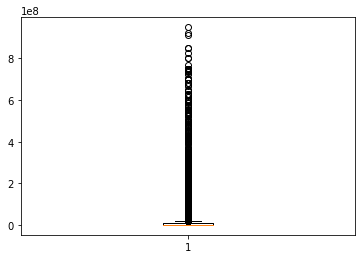

In [44]:
plt.boxplot(master_frame.raised_amount_usd)
plt.show()

#### Create dataframe using four funding type to find out representative values

In [45]:
#Create a dataframe having only 4 type of funding type we are interested
master_frame_4 = master_frame[master_frame.funding_round_type.isin(["venture", "seed", "angel", "private_equity"])]

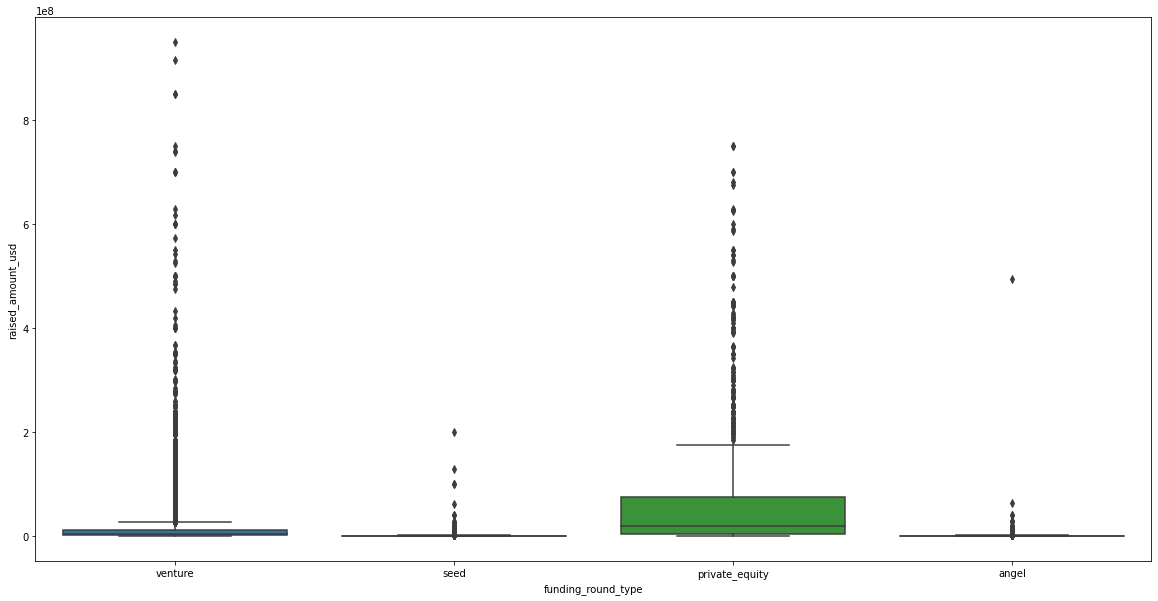

In [46]:
# Plot the boxplot to see the distribution of raised_amount_usd in these 4 FT
plt.figure(figsize=(20,10))
sns.boxplot(master_frame_4['funding_round_type'], master_frame.raised_amount_usd)
plt.show()

In [47]:
# use describe function to check the details of raised_amount_usd
master_frame_4.groupby("funding_round_type").describe()

raised_amount_usd                                           \
                               count        mean          std  min        25%   
funding_round_type                                                              
angel                        4400.00   971573.89   7710904.33 0.00  152756.50   
private_equity               1806.00 60782984.20 100630200.49 0.00 5000000.00   
seed                        21095.00   747793.68   2288317.64 0.00   68816.50   
venture                     47799.00 11082310.56  25794857.14 0.00 1600000.00   

                                                         
                           50%         75%          max  
funding_round_type                                       
angel                414906.00  1000000.00 494511992.00  
private_equity     20000000.00 75000000.00 750000000.00  
seed                 300000.00  1000000.00 200000000.00  
venture             5000000.00 12000000.00 950000000.00

In [48]:
new_df = master_frame.groupby("funding_round_type").median()

In [49]:
#new_df.reset_index(inplace=True, drop=True)
new_df[new_df.raised_amount_usd > 300000.00]

,raised_amount_usd
funding_round_type,
angel,414906.00
debt_financing,1086000.00
post_ipo_debt,15000000.00
post_ipo_equity,12000000.00
private_equity,20000000.00
secondary_market,45850000.00
undisclosed,1099538.00
venture,5000000.00


### Comment about choosing representation value
 - From the above we can see the there is huge variation between min and max value for raised_amount_usd across the round type. 
   i.e. there are outliers in this column. Mean will not give correct representation and hence will choose median.
   Representative value for below funding type:
       - seed           -   0.3 million USD
       - angel          -   0.4 million USD
       - venture        -   5.0 million USD
       - private equity -  20.0 million USD
       

### Best suitable investment type for spark fund
 - Considering the constraint that spark fund wants to invest 5 - 15 million USD "venture" is most suitable funding type for 
   them.
 - Create a new data frame using the selected funding type (i.e. venture)

In [50]:
# Filter out the data so that it contains only choosen funding type
master_frame_n = master_frame[(master_frame.funding_round_type == "venture")]

In [51]:
master_frame_n.shape

(47799, 8)

## Checkpoint 3: Country Analysis
- Find out top 9 countries which received highest total funding for spark funds
- Make a data frame named top9 with the top nine countries

In [52]:
# create a pivot table to find using country receiving highest fund. Sort the table and select top 9 using head(9)
master_pivot = (master_frame_n.pivot_table(values='raised_amount_usd', index="country_code", aggfunc='sum').sort_values("raised_amount_usd", ascending = False)).head(9)

In [52]:
# Display the pivot table
master_pivot

,raised_amount_usd
country_code,
USA,391368029342.00
CHN,38238918773.00
GBR,20072813004.00
IND,13261508718.00
CAN,9482217668.00
FRA,7226851352.00
ISR,6854350477.00
DEU,6306921981.00
JPN,3167647127.00


#### Comment about top three conutries
- From the above pivot_tale we can see the top 9 countries. 
- Top 3 English speaking countries among this list is 
    - USA
    - GBR
    - IND

In [53]:
# Create a list having all the top 9 countries
list1 = list(master_pivot.pivot_table(columns = "country_code"))
list1

['CAN', 'CHN', 'DEU', 'FRA', 'GBR', 'IND', 'ISR', 'JPN', 'USA']

In [54]:
# create a new dataframe top9 having only top 9 countries data
top9 = master_frame_n[(master_frame_n.country_code.isin(list1))]

In [55]:
#Reset the index
top9.reset_index(inplace=True, drop=True)

In [56]:
top9.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,05-01-2015,10000000.00,#fame,Media,operating,IND
1,/organization/0-6-com,venture,19-03-2008,2000000.00,0-6.com,Curated Web,operating,CHN
2,/organization/0ndine-biomedical-inc,venture,21-12-2009,719491.00,Ondine Biomedical Inc.,Biotechnology,operating,CAN
3,/organization/0xdata,venture,09-11-2015,20000000.00,H2O.ai,Analytics,operating,USA
4,/organization/0xdata,venture,03-01-2013,1700000.00,H2O.ai,Analytics,operating,USA


In [57]:
# check the total records in top9 df
top9.shape

(44108, 8)

## Checkpoint 4: Sector Analysis 1
- Extract the primary sector of each category list from the category_list column
- Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

- split the column based on category_list using delimiter ("|") and take the first value to create new column primary_sector in top9 DF. 
- Load the mapping file and merge the two dataframe based on new column primary_sector and main sector from mapping file.

In [58]:
# check the unique values in category_list column
top9.category_list.unique()

array(['Media', 'Curated Web', 'Biotechnology', ..., 'Messaging|Software',
       'Crowdsourcing|Knowledge Management',
       'Facebook Applications|Games|Networking|Technology'], dtype=object)

In [60]:
# create a new column by splitting category_list based on "|" and taking first value
top9['primary_sector'] = top9['category_list'].str.split("|").str[0]
top9.shape

(44108, 9)

In [61]:
# check top records to verify the new column primary_sector
top9.head(10)

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,Media
1,/organization/0-6-com,venture,19-03-2008,2000000.00,0-6.com,Curated Web,operating,CHN,Curated Web
2,/organization/0ndine-biomedical-inc,venture,21-12-2009,719491.00,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology
3,/organization/0xdata,venture,09-11-2015,20000000.00,H2O.ai,Analytics,operating,USA,Analytics
4,/organization/0xdata,venture,03-01-2013,1700000.00,H2O.ai,Analytics,operating,USA,Analytics
5,/organization/0xdata,venture,19-07-2014,8900000.00,H2O.ai,Analytics,operating,USA,Analytics
6,/organization/1-mainstream,venture,17-03-2015,5000000.00,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,Apps
7,/organization/10-minutes-with,venture,09-10-2014,4000000.00,10 Minutes With,Education,operating,GBR,Education
8,/organization/1000memories,venture,16-02-2011,2520000.00,1000memories,Curated Web,acquired,USA,Curated Web
9,/organization/1000museums-com,venture,14-10-2009,265940.00,1000museums.com,Curated Web,operating,USA,Curated Web


In [62]:
# drop category_list column as this is no longer required
top9 = top9.drop(["category_list"],axis=1)
top9.reset_index(inplace=True, drop=True)

In [63]:
# check the value_counts of new column
top9.primary_sector.value_counts()

Biotechnology                      6413
Software                           3859
Advertising                        2060
Health Care                        1741
Enterprise Software                1688
                                   ... 
Biotechnology and Semiconductor       1
Mobile Advertising                    1
Social News                           1
Service Industries                    1
MicroBlogging                         1
Name: primary_sector, Length: 587, dtype: int64

##### Load the mapping file and create a mapping table having category_list and main_sector 

In [64]:
mapping = pd.read_csv("mapping.csv")
mapping.shape

(688, 10)

In [65]:
mapping.reset_index(inplace=True, drop=True)
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [66]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [67]:
# category has one record with null value. Let's drop that record
mapping = mapping[~(mapping.category_list.isnull())]

In [68]:
# check null again
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [69]:
# Create a list of eight main sectors 
list_name = list(mapping.columns[1:])
# unpivot the table using pd.melt and give the new column name as main_sector
mapping = pd.melt(mapping, id_vars= "category_list" , value_vars = list_name, var_name='main_sector')
mapping.head()

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [70]:
# Remove the rows having value as 0, drop the "value" column and reset index
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping.reset_index(inplace=True, drop=True)

In [71]:
# Verify few sample records to confirm the table is correct
mapping.sample(10)

,category_list,main_sector
569,Colleges,"Social, Finance, Analytics, Advertising"
134,Music Services,Entertainment
323,Online Reservations,"News, Search and Messaging"
681,Social News,"Social, Finance, Analytics, Advertising"
626,Impact Investing,"Social, Finance, Analytics, Advertising"
44,Energy Ma0gement,Cleantech / Semiconductors
80,Business Travelers,Entertainment
429,Logistics,Others
189,Eyewear,Health
244,Displays,Manufacturing


In [72]:
# Check the unique value in category_list column
mapping.category_list.unique()

array(['Adventure Travel', 'Aerospace', 'Auto', 'Automated Kiosk',
       'Automotive', 'Bicycles', 'Boating Industry', 'CAD', 'Cars',
       'Design', 'Designers', 'Drones', 'Electric Vehicles', 'Fuels',
       'Heavy Industry', 'Industrial Automation', 'Limousines', 'Soccer',
       'Sporting Goods', 'Sports', 'Transportation',
       'Unmanned Air Systems', 'Air Pollution Control', 'Aquaculture',
       'Bio-Pharm', 'Biofuels', 'Bioinformatics',
       'Biomass Power Generation', 'Biometrics', 'Biotechnology',
       'Bitcoin', 'Carbon', 'Chemicals', 'Clean Energy',
       'Clean Technology', 'Clean Technology IT', 'Commercial Solar',
       'Commodities', 'Concentrated Solar Power', 'Disruptive Models',
       'Early-Stage Technology', 'Energy', 'Energy Efficiency',
       'Energy IT', 'Energy Ma0gement', 'Energy Storage',
       'Environmental Innovation', 'Fertility', 'Fuel Cells',
       'Funeral Industry', 'Gas', 'Green', 'Green Consumer Goods',
       'Home & Garden', 'Home Au

In [73]:
# on closer look I can see there is error in lots of value and in place of 'na' it has '0'. Correct the value
mapping.category_list = mapping.category_list.apply(lambda x: str(x).replace("0", "na"))

In [74]:
# Check the unique value in category_list column
mapping.category_list.unique()

array(['Adventure Travel', 'Aerospace', 'Auto', 'Automated Kiosk',
       'Automotive', 'Bicycles', 'Boating Industry', 'CAD', 'Cars',
       'Design', 'Designers', 'Drones', 'Electric Vehicles', 'Fuels',
       'Heavy Industry', 'Industrial Automation', 'Limousines', 'Soccer',
       'Sporting Goods', 'Sports', 'Transportation',
       'Unmanned Air Systems', 'Air Pollution Control', 'Aquaculture',
       'Bio-Pharm', 'Biofuels', 'Bioinformatics',
       'Biomass Power Generation', 'Biometrics', 'Biotechnology',
       'Bitcoin', 'Carbon', 'Chemicals', 'Clean Energy',
       'Clean Technology', 'Clean Technology IT', 'Commercial Solar',
       'Commodities', 'Concentrated Solar Power', 'Disruptive Models',
       'Early-Stage Technology', 'Energy', 'Energy Efficiency',
       'Energy IT', 'Energy Management', 'Energy Storage',
       'Environmental Innovation', 'Fertility', 'Fuel Cells',
       'Funeral Industry', 'Gas', 'Green', 'Green Consumer Goods',
       'Home & Garden', 'Home A

In [75]:
round(100*(mapping.isnull().sum()/len_df),2)

category_list   0.00
main_sector     0.00
dtype: float64

##### Merge top9 and mapping 
- Before converting change common column in lower case

In [76]:
#convert the primary_sector in lower case
top9.primary_sector = top9.primary_sector.str.lower()

In [77]:
#convert the category_list in lower case
mapping.category_list = mapping.category_list.str.lower()

In [78]:
top9 = pd.merge(top9, mapping, how = 'inner', left_on = "primary_sector", right_on="category_list")
top9.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,category_list,main_sector
0,/organization/-fame,venture,05-01-2015,10000000.00,#fame,operating,IND,media,media,Entertainment
1,/organization/90min,venture,06-10-2015,15000000.00,90min,operating,GBR,media,media,Entertainment
2,/organization/90min,venture,07-05-2013,5800000.00,90min,operating,GBR,media,media,Entertainment
3,/organization/90min,venture,26-03-2014,18000000.00,90min,operating,GBR,media,media,Entertainment
4,/organization/all-def-digital,venture,06-08-2014,5000000.00,All Def Digital,operating,USA,media,media,Entertainment


In [79]:
# drop the category_list column as this is not required
top9 = top9.drop('category_list', axis = 1)
mapping.reset_index(inplace=True, drop=True)

In [80]:
top9.shape

(44092, 9)

In [81]:
top9.sample(10)

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
24465,/organization/reformation,venture,02-04-2015,12000000.00,Reformation,operating,USA,e-commerce,Others
30607,/organization/mobi-tech,venture,21-04-2010,150000.00,Mobi Tech,operating,USA,mobile,"News, Search and Messaging"
43508,/organization/luxe-valet,venture,25-02-2015,20000000.00,Luxe,operating,USA,mobile devices,"News, Search and Messaging"
32824,/organization/first-wave-technologies,venture,07-03-2011,535000.00,First Wave Technologies,closed,USA,consulting,"Social, Finance, Analytics, Advertising"
32982,/organization/tango-publishing,venture,11-07-2013,725000.00,Tango Publishing,operating,USA,consulting,"Social, Finance, Analytics, Advertising"
10535,/organization/spiral-toys,venture,03-09-2015,864535.00,Spiral Toys,operating,USA,games,Entertainment
41372,/organization/goodmail-system,venture,06-12-2006,12000000.00,Goodmail Systems,closed,USA,email,"News, Search and Messaging"
6169,/organization/provista-diagnostics,venture,03-08-2015,6046254.00,Provista Diagnostics,operating,USA,biotechnology,Cleantech / Semiconductors
17551,/organization/prepared-response,venture,18-06-2009,6309399.00,Prepared Response,operating,USA,enterprise software,Others
4185,/organization/hemera-biosciences,venture,01-04-2013,1299956.00,Hemera Biosciences,operating,USA,biotechnology,Cleantech / Semiconductors


In [82]:
# check the null value
top9.isnull().sum()

company_permalink     0
funding_round_type    0
funded_at             0
raised_amount_usd     0
name                  0
status                0
country_code          0
primary_sector        0
main_sector           0
dtype: int64

## Checkpoint 5: Sector Analysis 2
- Create three dataframe D1, D2 and D3 for top 3 english speaking countries from top9 dataframe. 
- Group by all the 3 dataframe on the basis of "main_sector" and find out top performing sectors
- Create three new dataframes for selected main_sector and use pivot table to find out the name of companies

In [83]:
# Create dataframe D1 for country "USA", reset index and check top records
D1 = top9[top9.country_code == 'USA']
D1.reset_index(inplace=True, drop=True)
D1.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
0,/organization/all-def-digital,venture,06-08-2014,5000000.00,All Def Digital,operating,USA,media,Entertainment
1,/organization/audiosocket,venture,02-05-2013,650000.00,Audiosocket,operating,USA,media,Entertainment
2,/organization/audiosocket,venture,02-09-2009,750000.00,Audiosocket,operating,USA,media,Entertainment
3,/organization/audiosocket,venture,15-02-2012,1582300.00,Audiosocket,operating,USA,media,Entertainment
4,/organization/babble,venture,05-02-2009,2000000.00,Babble,acquired,USA,media,Entertainment


In [84]:
# Create dataframe D2 for country "GBR", Select only required column and reset the index
D2 = top9[top9.country_code == 'GBR']
D2.reset_index(inplace=True, drop=True)
D2.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
0,/organization/90min,venture,06-10-2015,15000000.00,90min,operating,GBR,media,Entertainment
1,/organization/90min,venture,07-05-2013,5800000.00,90min,operating,GBR,media,Entertainment
2,/organization/90min,venture,26-03-2014,18000000.00,90min,operating,GBR,media,Entertainment
3,/organization/teepix,venture,14-11-2007,1655405.00,Teepix,operating,GBR,media,Entertainment
4,/organization/arenaflowers-com,venture,12-01-2015,310000.00,Arena Online Ltd,operating,GBR,curated web,"News, Search and Messaging"


In [85]:
# Create dataframe D3 for country "IND", Select only required column and reset the index
D3 = top9[top9.country_code == 'IND']
D3.reset_index(inplace=True, drop=True)
D3.head()

,company_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,05-01-2015,10000000.00,#fame,operating,IND,media,Entertainment
1,/organization/manas-informatics,venture,02-02-2008,160000.00,Manas Informatic,operating,IND,media,Entertainment
2,/organization/babajob,venture,28-04-2015,10000000.00,Babajob,operating,IND,curated web,"News, Search and Messaging"
3,/organization/bharat-matrimony,venture,05-02-2008,11750000.00,Bharat Matrimony,operating,IND,curated web,"News, Search and Messaging"
4,/organization/bluestone-com,venture,24-01-2012,5000000.00,Bluestone.com,operating,IND,curated web,"News, Search and Messaging"


#### Get the top 3 sectors (counts wise) for all 3 countries

In [86]:
# Find out the top 3 sectors based on count for D1, D2 and D3
DF1 = D1.main_sector.value_counts().head(3)
DF2 = D2.main_sector.value_counts().head(3)
DF3 = D3.main_sector.value_counts().head(3)
print("Top 3 sectors for D1(USA):") 
print(DF1)
print()
print("Top 3 sectors for D2(GBR):") 
print(DF2)
print()
print("Top 3 sectors for D3(IND):") 
print(DF3)

Top 3 sectors for D1(USA):
Others                                     8309
Cleantech / Semiconductors                 7995
Social, Finance, Analytics, Advertising    7245
Name: main_sector, dtype: int64

Top 3 sectors for D2(GBR):
Others                                     516
Cleantech / Semiconductors                 442
Social, Finance, Analytics, Advertising    421
Name: main_sector, dtype: int64

Top 3 sectors for D3(IND):
Others                                     283
Social, Finance, Analytics, Advertising    147
News, Search and Messaging                 130
Name: main_sector, dtype: int64


#### Use group by function on main_sector column on three dataframe to find out total count and sum of investment for each sector

In [87]:
# group by "main_sector" for all three Dataframe
D1_grp = D1.groupby("main_sector")
D2_grp = D2.groupby("main_sector")
D3_grp = D3.groupby("main_sector")

In [88]:
# check the deatils of D1
D1_grp.raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
main_sector,,,,,,,,
Automotive & Sports,500.00,12464329.39,32842608.72,29.00,1365609.50,5000000.00,12000000.00,600000000.00
Cleantech / Semiconductors,7995.00,12799483.97,24205939.43,0.00,1600000.00,5892744.00,15500000.00,849803496.00
Entertainment,1794.00,9484147.69,20095771.70,0.00,1500000.00,4500000.00,10000000.00,475000000.00
Health,3269.00,9689525.17,16071941.15,0.00,1100000.00,4099999.00,12000000.00,320000000.00
Manufacturing,2453.00,10128544.42,17543548.13,1000.00,1360000.00,5000000.00,12200000.00,350000000.00
"News, Search and Messaging",4356.00,10468439.18,24892998.11,750.00,1800000.00,5000000.00,10697230.75,739000000.00
Others,8309.00,9844364.38,21060341.60,0.00,1500000.00,5000000.00,10968800.00,573000000.00
"Social, Finance, Analytics, Advertising",7245.00,11267274.31,28133616.43,0.00,2000000.00,5243297.00,12000000.00,950000000.00


In [89]:
# check the deatils of D2
D2_grp.raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
main_sector,,,,,,,,
Automotive & Sports,44.00,10929061.64,12805554.43,200000.00,2171626.50,6615120.50,14625000.00,60000000.00
Cleantech / Semiconductors,442.00,11478031.88,20985113.64,45758.00,1924929.25,5275529.50,13200000.00,320000000.00
Entertainment,136.00,8548271.16,16059759.20,10000.00,2077735.25,5000000.00,10000000.00,170604000.00
Health,118.00,8869955.98,12755795.76,58591.00,1020166.75,3372179.50,11215237.50,73114215.00
Manufacturing,122.00,8354780.44,13064997.52,20324.00,1804293.75,4552876.50,9794560.00,100000000.00
"News, Search and Messaging",241.00,12265658.71,59926854.70,1552.00,1500000.00,4000000.00,10000000.00,915000000.00
Others,516.00,8705852.03,25116531.73,4.00,1300000.00,3726438.50,8625000.00,500000000.00
"Social, Finance, Analytics, Advertising",421.00,8962775.94,15129266.38,0.00,1600000.00,4205355.00,9100000.00,119000000.00


In [90]:
# check the deatils of D3
D3_grp.raised_amount_usd.describe()

,count,mean,std,min,25%,50%,75%,max
main_sector,,,,,,,,
Automotive & Sports,31.00,50204838.71,113751411.97,250000.00,6450000.00,15000000.00,27000000.00,500000000.00
Cleantech / Semiconductors,54.00,14563789.50,22484537.07,187000.00,3125000.00,6200000.00,15600000.00,125000000.00
Entertainment,76.00,12844628.64,14910148.55,160000.00,3475000.00,7500000.00,15000000.00,60000000.00
Health,42.00,13437380.95,19227883.85,1000000.00,4000000.00,8400000.00,11775000.00,90000000.00
Manufacturing,55.00,13277454.55,17786113.53,790000.00,3259000.00,10000000.00,16000000.00,120000000.00
"News, Search and Messaging",130.00,13381384.22,19950603.00,40000.00,3000000.00,6500000.00,13750000.00,150000000.00
Others,283.00,18832181.77,50065112.18,0.00,3000000.00,7500000.00,16250000.00,700000000.00
"Social, Finance, Analytics, Advertising",147.00,10740169.52,14796623.95,10000.00,2400000.00,5740000.00,13000000.00,100000000.00


In [91]:
# find the total counts of investment for D1, D2 and D3
D1_tot_cnt = D1_grp.raised_amount_usd.count().sum()
D2_tot_cnt = D2_grp.raised_amount_usd.count().sum()
D3_tot_cnt = D3_grp.raised_amount_usd.count().sum()
print("Total number of investment for D1(USA): " + str(D1_tot_cnt))
print("Total number of investment for D2(GBR): " + str(D2_tot_cnt))
print("Total number of investment for D3(IND): " + str(D3_tot_cnt))

Total number of investment for D1(USA): 35921
Total number of investment for D2(GBR): 2040
Total number of investment for D3(IND): 818


In [92]:
# find the sum of total amount of investment for D1
D1_tot_sum = round(D1_grp.raised_amount_usd.sum().sum()/10**6,0)
D2_tot_sum = round(D2_grp.raised_amount_usd.sum().sum()/10**6,0)
D3_tot_sum = round(D3_grp.raised_amount_usd.sum().sum()/10**6,0)
print("Total amount of investment for D1(USA): " + str(D1_tot_sum) + " M USD")
print("Total amount of investment for D2(GBR): " + str(D2_tot_sum) + " M USD")
print("Total amount of investment for D3(IND): " + str(D3_tot_sum) + " M USD")

Total amount of investment for D1(USA): 391128.0 M USD
Total amount of investment for D2(GBR): 20004.0 M USD
Total amount of investment for D3(IND): 13262.0 M USD


#### Find out the name of companies from top two sectors (countwise) for all top 3 countries
- Use top two sectors for each company to create pivot table
    - For D1 top sectors are "Others" and "Cleantech / Semiconductors"
    - For D2 top sectors are "Others" and "Cleantech / Semiconductors"
    - For D3 top sectors are "Others" and "News, Search and Messaging"


In [93]:
# Create a new dataframe from D1 for main_sector 'Others'. Then create pivot table to find total amount of investment
D1_new = D1[D1.main_sector == 'Others']
D1_pivot = (D1_new.pivot_table(values='raised_amount_usd', index="name", aggfunc='sum').sort_values("raised_amount_usd", ascending = False))
# Name of company received the highest investment for sector "others" for D1
D1_pivot.head(1)

,raised_amount_usd
name,
Snapchat,1165100000.00


In [94]:
# Create a new dataframe from D2 for main_sector 'Others'. Then create pivot table to find total amount of investment
D2_new = D2[D2.main_sector == 'Others']
D2_pivot = (D2.pivot_table(values='raised_amount_usd', index="name", aggfunc='sum').sort_values("raised_amount_usd", ascending = False))
# Name of company received the highest investment for sector "others" for D2
D2_pivot.head(1)

,raised_amount_usd
name,
SoftViaNet,915000000.00


In [95]:
# Create a new dataframe from D3 for main_sector 'Others'. Then create pivot table to find total amount of investment
D3_new = D3[D3.main_sector == 'Others']
D3_pivot = (D3.pivot_table(values='raised_amount_usd', index="name", aggfunc='sum').sort_values("raised_amount_usd", ascending = False))
# Name of company received the highest investment for sector "others" for D3
D3_pivot.head(1)

,raised_amount_usd
name,
Flipkart,1451000000.00


In [96]:
# Create a new dataframe from D1 for main_sector 'Cleantech / Semiconductors'. Then create pivot table to find total amount of investment
D1_new1 = D1[D1.main_sector == 'Cleantech / Semiconductors']
D1_pivot1 = (D1_new1.pivot_table(values='raised_amount_usd', index="name", aggfunc='sum').sort_values("raised_amount_usd", ascending = False))
# Name of company received the highest investment for sector "Cleantech / Semiconductors" for D1
D1_pivot1.head(1)

,raised_amount_usd
name,
Juno Therapeutics,1159803496.00


In [97]:
# Create a new dataframe from D2 for main_sector 'Cleantech / Semiconductors'. Then create pivot table to find total amount of investment
D2_new1 = D2[D2.main_sector == 'Cleantech / Semiconductors']
D2_pivot1 = (D2_new1.pivot_table(values='raised_amount_usd', index="name", aggfunc='sum').sort_values("raised_amount_usd", ascending = False))
# Name of company received the highest investment for sector "Cleantech / Semiconductors" for D2
D2_pivot1.head(1)

,raised_amount_usd
name,
Immunocore,320000000.00


In [98]:
# Create a new dataframe from D3 for main_sector 'Social, Finance, Analytics, Advertising'. Then create pivot table to find total amount of investment
D3_new1 = D3[D3.main_sector == 'News, Search and Messaging']
D3_pivot1 = (D3_new1.pivot_table(values='raised_amount_usd', index="name", aggfunc='sum').sort_values("raised_amount_usd", ascending = False))
# Name of company received the highest investment for sector "Social, Finance, Analytics, Advertising" for D3
D3_pivot1.head(1)

,raised_amount_usd
name,
Quikr,346000000.00


## Checkpoint 6: Plots
#### Three plots are required as below:
- A plot showing the representative amount of investment in each funding type. I will draw plot for 4 FT here.
- A plot showing the top 9 countries against the total amount of investments of funding type
- A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 

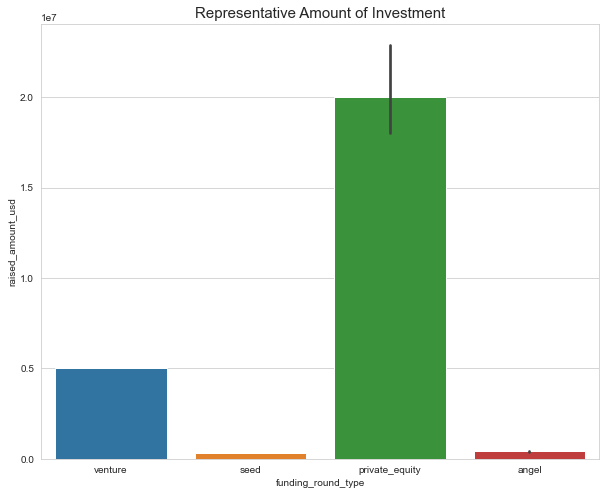

In [100]:
# will plot seaborn barplot for plot showing the representative amount of investment in each funding type
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.barplot(data=master_frame_4, x='funding_round_type', y='raised_amount_usd', estimator=np.median)
plt.title("Representative Amount of Investment", fontsize=15)
plt.show()

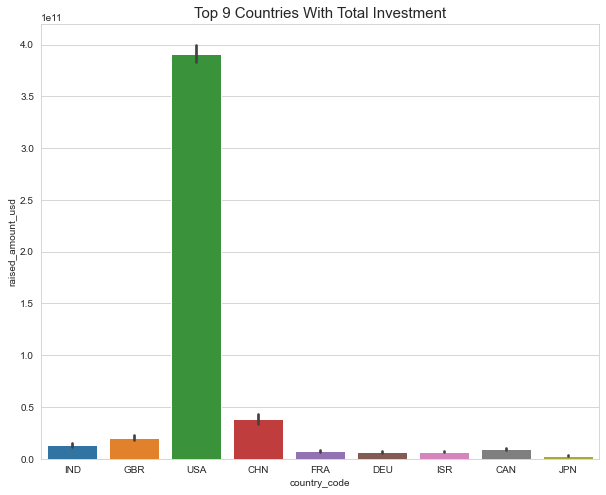

In [101]:
# plot showing the top 9 countries against the total amount of investments of funding type
plt.figure(figsize=[10,8])
sns.barplot(data=top9, x='country_code', y='raised_amount_usd', estimator=np.sum)
plt.title("Top 9 Countries With Total Investment", fontsize=15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

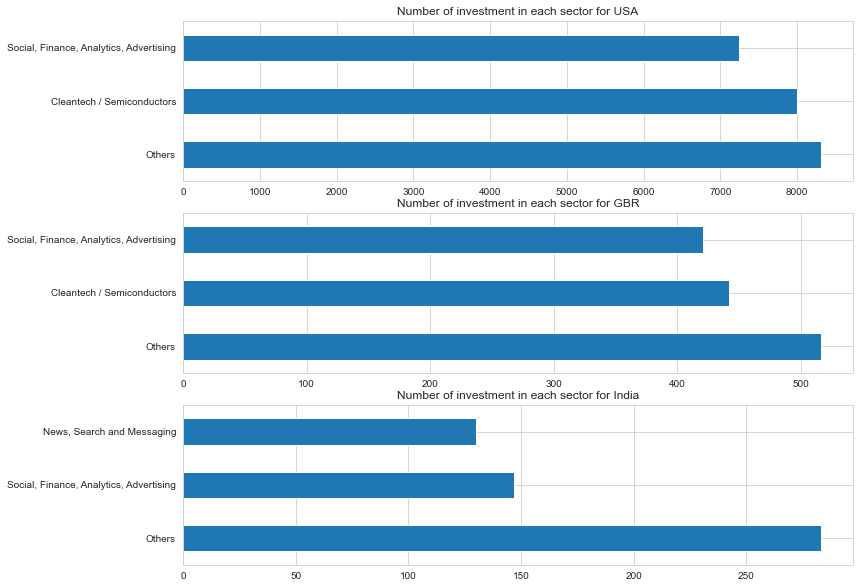

In [102]:
#plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart
# Will use DF1, DF2 and DF3 datafrmae (for top3 sectors created above)
plt.figure(figsize=[12,10])

plt.subplot(3,1,1)
DF1.plot.barh()
plt.title("Number of investment in each sector for USA", fontsize=12)

plt.subplot(3,1,2)
DF2.plot.barh()
plt.title("Number of investment in each sector for GBR", fontsize=12)

plt.subplot(3,1,3)
DF3.plot.barh()
plt.title("Number of investment in each sector for India", fontsize=12)
plt.show